PROJETO: Análise Exploratória

22/08/2022

Antonio Valle de Almeida Magalhães Guimarães - RA: 202051568399

Caio Montini Argenton - RA: 202051736798



CONTEXTO DO PROJETO

A ideia central da análise que iremos apresentar nos dados a seguir busca evidenciar a relação entre o consumo de abacates do tipo 4046 em relação as regiões do mundo e a seus pares concorrentes, e como o preço interfere neste consumo. É evidente dizer que o abacate não é das frutas mais consumidas do mundo e com relação a, entretanto a análise se torna mais interessante pelo fato de que, por ser uma fruta não tão amada pela maioria, seu consumo não é sazonal.

Estrutura dos dados:

Date: data do registro

AveragePrice: Preço médio do abacate vendido na data em questão

Total Volume: quantidade de abacates vendidos no dia em questão

4046: quantidade de abacates vendidos com a LPU 4046

Total Bags: quantidade de abacates por sacola de abacate

Type: tipo do abacate vendido (convencional ou organico)

Year: respectivo ano da análise

Region: Região respectiva da venda do abacate

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
avog=pd.read_csv('/content/drive/My Drive/IBMEC/Data Mining/avocado.csv',encoding='ISO-8859-1')
avog_2 = avog.drop(['Unnamed: 0'], axis=1)
avog_3 = avog_2.drop(['XLarge Bags'], axis=1)
avog_4 = avog_3.drop(['Large Bags'], axis=1)
avog_5 = avog_4.drop(['Small Bags'], axis=1)
avog_6 = avog_5.drop(['4225'], axis=1)
avogn = avog_6.drop(['4770'], axis=1)
avogn.head(10)

Date  AveragePrice  Total Volume     4046  Total Bags          type  \
0  2015-12-27          1.33      64236.62  1036.74     8696.87  conventional   
1  2015-12-20          1.35      54876.98   674.28     9505.56  conventional   
2  2015-12-13          0.93     118220.22   794.70     8145.35  conventional   
3  2015-12-06          1.08      78992.15  1132.00     5811.16  conventional   
4  2015-11-29          1.28      51039.60   941.48     6183.95  conventional   
5  2015-11-22          1.26      55979.78  1184.27     6683.91  conventional   
6  2015-11-15          0.99      83453.76  1368.92     8318.86  conventional   
7  2015-11-08          0.98     109428.33   703.75     6829.22  conventional   
8  2015-11-01          1.02      99811.42  1022.15    11388.36  conventional   
9  2015-10-25          1.07      74338.76   842.40     8625.92  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany  
5  2015  Albany  
6  2015  Albany  
7  2015  Albany  
8  2015  Albany  
9  2015  Albany

In [ ]:
avogn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   Total Bags    18249 non-null  float64
 5   type          18249 non-null  object 
 6   year          18249 non-null  int64  
 7   region        18249 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 1.1+ MB


In [ ]:
avog_1 = avogn.drop(avogn.index[(avogn["region"] == "TotalUS")],axis=0,inplace=True)

Na planilha está presente entre os dados o numero total de abacates produzidos nos EUA no entanto este numero atrapalha na hora de fazer os graficos uma vez que este está repetindo os dados. Logo, foi necessario a retirada deste para melhor analisar os dados.

**Estatisticas Descritivas**

In [ ]:
avogn.describe()

AveragePrice  Total Volume          4046    Total Bags          year
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  18249.000000
mean       1.405978  8.506440e+05  2.930084e+05  2.396392e+05   2016.147899
std        0.402677  3.453545e+06  1.264989e+06  9.862424e+05      0.939938
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00   2015.000000
25%        1.100000  1.083858e+04  8.540700e+02  5.088640e+03   2015.000000
50%        1.370000  1.073768e+05  8.645300e+03  3.974383e+04   2016.000000
75%        1.660000  4.329623e+05  1.110202e+05  1.107834e+05   2017.000000
max        3.250000  6.250565e+07  2.274362e+07  1.937313e+07   2018.000000

A variavél que iremos analisar com mais detalhe tem um valor mínimo indicado na tabela acima de 0.440000 e um valor indicado máximo de 3.25000. Podemos perceber, com isso, que o valor expresso possui uma mínima e uma máxima não muito distante de sua média. Um dos motivos pelos quais isso acontece vem do fato de que o abacate é uma fruta em que o consumo tende a ser mais inelástico.

Passando essa primeira análise, podemos partir para uma matriz de correlação. O interessante da matriz de correlação é que análise de correlação é uma forma descritiva que mede se há e qual o grau de dependência entre variáveis, ou seja, o quanto uma variável interfere em outra.

A análise de correlação vai retornar três possíveis cenários: correlação positiva; correlação negativa; e não há correlação.

In [ ]:
avogn.corr()

AveragePrice  Total Volume      4046  Total Bags      year
AveragePrice      1.000000     -0.343982 -0.342105   -0.307685  0.091897
Total Volume     -0.343982      1.000000  0.895002    0.924980  0.030621
4046             -0.342105      0.895002  1.000000    0.776373  0.004244
Total Bags       -0.307685      0.924980  0.776373    1.000000  0.122705
year              0.091897      0.030621  0.004244    0.122705  1.000000

Podemos notar que a tabela apresenta correlação de -0.343982 entre o preço medio e o volume total visto que quanto maior a produção de abacate mais oferta tem logo pelas leis da oferta e demanda o preço abaixa. O mesmo pode ser dito para a correlação do tipo de abacate 4046 (-0.342105) e para o numero total de sacolas (-0.0307685)

A relação de Volume total e do tipo de abacate 4046 é positiva quanto mais abacates que apresentam 4046 LPU mais abacates totais ter. O numero total de sacolas aumentam com o maior volume de abacates. E o volume de abacates produzidos tem crescidos com os anos. 

A correlação entre os abacates com 4046 LPU e quantidade total de sacolas é positiva uma vez que quanto mais volume de sacolas mias abacate com esse nive de LPU é produzido. E ao passar dos anos mais abacate tem sido produzido e logo uma maior quantidade com 4046 LPU.

E finalmente com o crescimento da produção de abacates uma maior quantidades de sacolas tem sido vendidas o que explica a correlação positiva. 

In [ ]:
sumptype = avogn.groupby('type').sum()['Total Volume']
print(sumptype)
sumptype.plot(kind='pie')
freqtp = avogn['type'].value_counts()
print(freqtp)

type
conventional    9.385999e+09
organic         2.726631e+08
Name: Total Volume, dtype: float64
conventional    8957
organic         8954
Name: type, dtype: int64


Podemos analisar com esse grafico que mesmo nos tempos onde o organico é melhor e muito mais saudavel e é prezados pela população fitness, a maior parte do volume dos abacates produzidas são feitos de maneira convencional. Nos temos isto visto a dificuldade de se plantar abacate sendo está uma fruta que depende de condições ideias e logo torna se dificil a plantação desta de forma organica visto ao rapido deterioramento da fruta diante dos produzidos convencialmente. 

In [ ]:
sumptype1 = avogn.groupby('type').sum()['4046']
print(sumptype1)
sumptype1 = avogn.groupby('type').count()['4046']
print(sumptype1)

type
conventional    3.250554e+09
organic         4.162043e+07
Name: 4046, dtype: float64
type
conventional    8957
organic         8954
Name: 4046, dtype: int64


In [ ]:
sumpregion = avogn.groupby('region').mean()['AveragePrice']
print(sumpregion)
sumpregion.plot(kind='pie')

region
Albany                 1.561036
Atlanta                1.337959
BaltimoreWashington    1.534231
Boise                  1.348136
Boston                 1.530888
BuffaloRochester       1.516834
California             1.395325
Charlotte              1.606036
Chicago                1.556775
CincinnatiDayton       1.209201
Columbus               1.252781
DallasFtWorth          1.085592
Denver                 1.218580
Detroit                1.276095
GrandRapids            1.505000
GreatLakes             1.338550
HarrisburgScranton     1.513284
HartfordSpringfield    1.818639
Houston                1.047929
Indianapolis           1.313994
Jacksonville           1.510947
LasVegas               1.380917
LosAngeles             1.216006
Louisville             1.286686
MiamiFtLauderdale      1.428491
Midsouth               1.404763
Nashville              1.212101
NewOrleansMobile       1.304793
NewYork                1.727574
Northeast              1.601923
NorthernNewEngland     1.477396
O

Assim como dito na matriz de correlação o preço do abacate tende a ser inelastico, variando pouco de uma região para outra, como pode se observar no grafico acima.

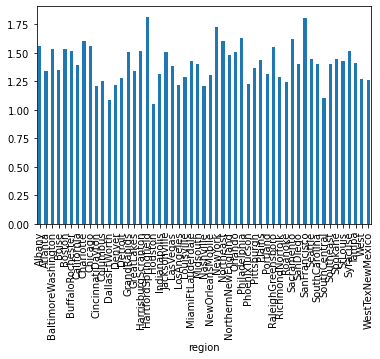

In [23]:
sumpregion.plot(kind='bar')

Podemos avaliar no grafico acima que as regiões onde o abacate é mias caro são; Sao Francisco e Hartford-Spingfield. O fato de isto acontecer é porque pelo menos 50% do abacate vendido é organico o que eleva os preços. 

In [ ]:
sumpyear = avogn.groupby('year').mean()['Total Volume']
print(sumpyear)
sumpyear.plot(kind='line')

year
2015    495048.709966
2016    544581.050263
2017    546583.357530
2018    675397.866384
Name: Total Volume, dtype: float64


É possivel analisar no grafico acima que com o passar dos anos a venda de abacates cresceu exponencialmente muito pelo fato de que o preço ao longo dos anos vem caindo e se aproximando cada vez mais da media. Assim como observado no grafico abaixo.

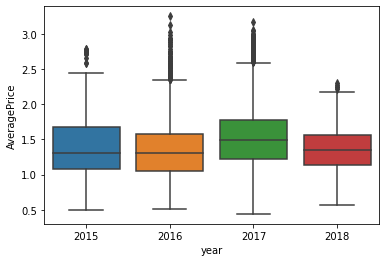

In [ ]:
sns.boxplot(x='year', y = 'AveragePrice', data=avogn)

In [33]:
Freq = avogn.groupby('AveragePrice').mean()['Total Volume']
print(Freq)
Freq.plot(kind='hist')

AveragePrice
0.44      64057.040
0.46    2200550.270
0.48      50890.730
0.49     590865.730
0.51     868936.546
           ...     
3.04      12656.320
3.05       2068.260
3.12      19043.800
3.17       3018.560
3.25      16700.940
Name: Total Volume, Length: 259, dtype: float64


Com o grafico acima é possivel interpretar que o maior nivel de abacate vendido é quando o preço está em 0.46.

Em nosso projeto, nós fizemos nossas análises com um total de 18.250 observações, o que torna nossa análise bastante representativa. E diante disso, conseguimos traçar como a venda do abacate se comporta em relação ao seu preço e como a venda de abacates e o seu consumo vem mudando com o passar do tempo.